In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations for Different Fairness Interventions

In [4]:
from source.visualizations import create_box_plot_for_diff_interventions
from source.utils.data_vis_utils import create_metrics_dicts_for_diff_fairness_interventions

pip install 'aif360[LawSchoolGPA]'


## Initialize Configs

In [5]:
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASETS_DB_CONFIG = {
    'Folktables_GA_2018_Income': {
        'Baseline': 'ac796b56-9c83-474a-8e7a-2d95ee5efa7e',
        'LFR': '3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba',
        'DIR': 'f009c98f-b732-44cf-9084-4bf12c11bdcf',
        # 'AdversarialDebiasing': '',
        # 'ExpGradientReduction': '',
        'EqOddsPostprocessing': '3976c1bf-99fa-49f4-97ec-44b13cb64ef4',
        'ROC': '426f4b41-5b22-4118-b5c8-15a0ab4aa18f',
    },
    # 'Folktables_CA_2018_Public_Coverage': {
    #     'Baseline': 'c36d3f62-2edd-4df4-97db-a9c3cb5be8ed',
    #     'LFR': '3021b0c7-483d-4682-9dc6-bb4a2cf90020',
    #     'DIR': 'ac38ec40-c789-4f7e-91be-9ffb55bc3e6f',
    #     'EqOddsPostprocessing': 'c1fbe1ae-f5e9-4ca1-8f38-abe1b118f95b',
    #     'ROC': 'aa7a7273-bf7c-44f9-becc-3b0384b722c5',
    # },
    # 'Law_School': {
    #     'Baseline': 'b37c9c58-ed69-425c-b3d5-8f1ffd3adcd6',
    #     'LFR': 'a1345526-1623-4fc7-b1a4-2a7790c4eef5',
    #     'DIR': '336e4621-fef9-4722-a3c1-b2ecca7e7f45',
    #     'EqOddsPostprocessing': '567e7e80-5ed4-4a45-8927-2f7b61ba5647',
    #     'ROC': 'b1f109f5-3def-4da0-872b-6f0f1a9be953',
    # },
    # 'Student_Performance_Por': {
    #     'Baseline': '647daccf-7c14-463c-99ab-ef16972dba80',
    #     'LFR': '638da338-6a90-44a7-a835-17f062b941fb',
    #     'DIR': '647daccf-7c14-463c-99ab-ef16972dba80',
    #     'EqOddsPostprocessing': 'b35e31f2-bb03-494f-a24c-b9264e383667',
    #     'ROC': '0626d80f-e288-4f16-b8ab-260eb34d62d3',
    # },
}
DATASET_NAMES = list(DATASETS_DB_CONFIG.keys())
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
DATASETS_SENSITIVE_ATTRS = {
    'Folktables_GA_2018_Income': ['SEX', 'RAC1P', 'SEX&RAC1P'],
    'Law_School': ['male', 'race', 'male&race'],
    'Folktables_CA_2018_Public_Coverage': ['SEX', 'RAC1P', 'SEX&RAC1P'],
    'Student_Performance_Por': ['sex'],
}

## Group Metrics Composition

In [6]:
all_subgroup_metrics_df, all_group_metrics_df = (
    create_metrics_dicts_for_diff_fairness_interventions(datasets_db_config=DATASETS_DB_CONFIG,
                                                         datasets_sensitive_attrs_dct=DATASETS_SENSITIVE_ATTRS,
                                                         db_collection_name=DB_COLLECTION_NAME))

Extracted metrics for Folktables_GA_2018_Income dataset and Baseline intervention
Extracted metrics for Folktables_GA_2018_Income dataset and LFR intervention
Extracted metrics for Folktables_GA_2018_Income dataset and DIR intervention
Extracted metrics for Folktables_GA_2018_Income dataset and EqOddsPostprocessing intervention
Extracted metrics for Folktables_GA_2018_Income dataset and ROC intervention


In [7]:
all_subgroup_metrics_df.head(20)

,Metric,Model_Name,Dataset_Name,Num_Estimators,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,Fair_Intervention_Params_Lst,Intervention_Param,Subgroup,Metric_Value,Fairness_Intervention
0,Statistical_Bias,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.297552,Baseline
1,Std,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.049091,Baseline
2,IQR,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.065426,Baseline
3,Overall_Uncertainty,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.647023,Baseline
4,Aleatoric_Uncertainty,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.634515,Baseline
5,Mean_Prediction,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.616530,Baseline
6,Epistemic_Uncertainty,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.012508,Baseline
7,Label_Stability,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.909105,Baseline
8,Jitter,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.064624,Baseline
9,TPR,LGBMClassifier,Folktables_GA_2018_Income,200,2024-01-06 18:59:47.583,ac796b56-9c83-474a-8e7a-2d95ee5efa7e,Exp_iter_1,100,[0.0],0.0,SEX_priv,0.656289,Baseline


In [9]:
all_group_metrics_df.head(20)

,Metric,Model_Name,Dataset_Name,Fairness_Intervention,Group,Metric_Value
0,Accuracy_Parity,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,0.046051
1,Aleatoric_Uncertainty_Parity,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,-0.039453
2,Aleatoric_Uncertainty_Ratio,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,0.937821
3,Epistemic_Uncertainty_Parity,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,0.000196
4,Epistemic_Uncertainty_Ratio,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,1.015684
5,Equalized_Odds_FNR,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,0.029783
6,Equalized_Odds_FPR,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,-0.038663
7,IQR_Parity,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,-0.001807
8,Jitter_Parity,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,-0.005488
9,Label_Stability_Ratio,LGBMClassifier,Folktables_GA_2018_Income,Baseline,SEX,1.006402


## Metric Visualizations

### Overall Metrics

In [10]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

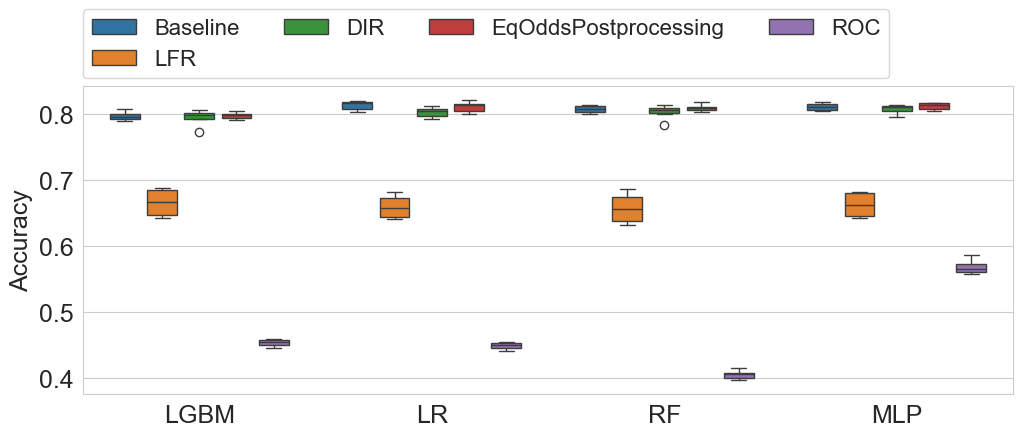

In [11]:
create_box_plot_for_diff_interventions(all_subgroup_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Accuracy',
                                       vals_to_replace=vals_to_replace)

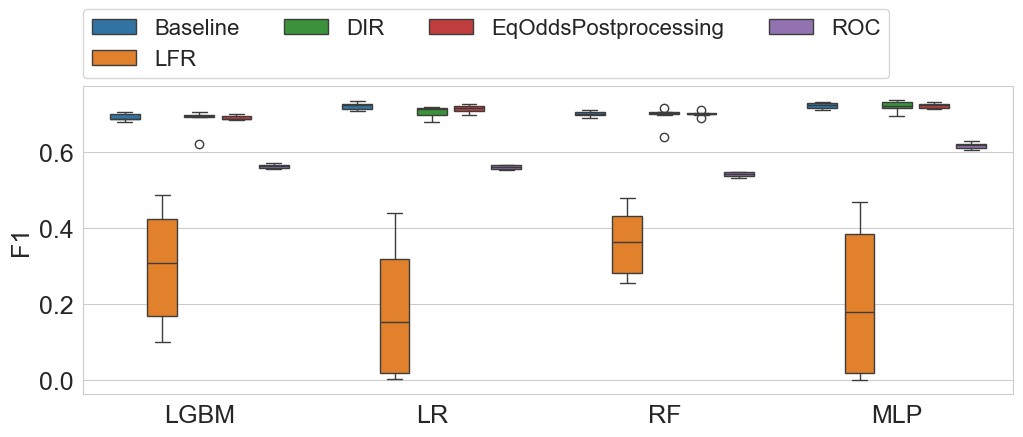

In [12]:
create_box_plot_for_diff_interventions(all_subgroup_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='F1',
                                       vals_to_replace=vals_to_replace)

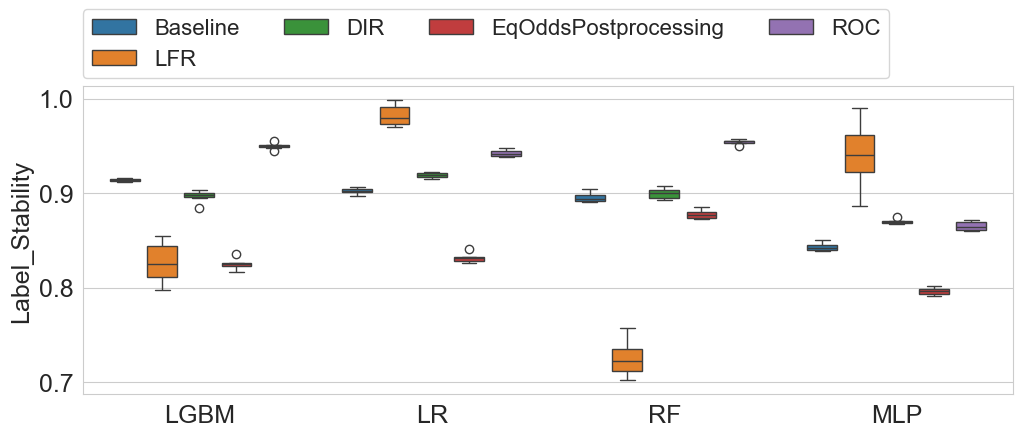

In [13]:
create_box_plot_for_diff_interventions(all_subgroup_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Label_Stability',
                                       vals_to_replace=vals_to_replace)

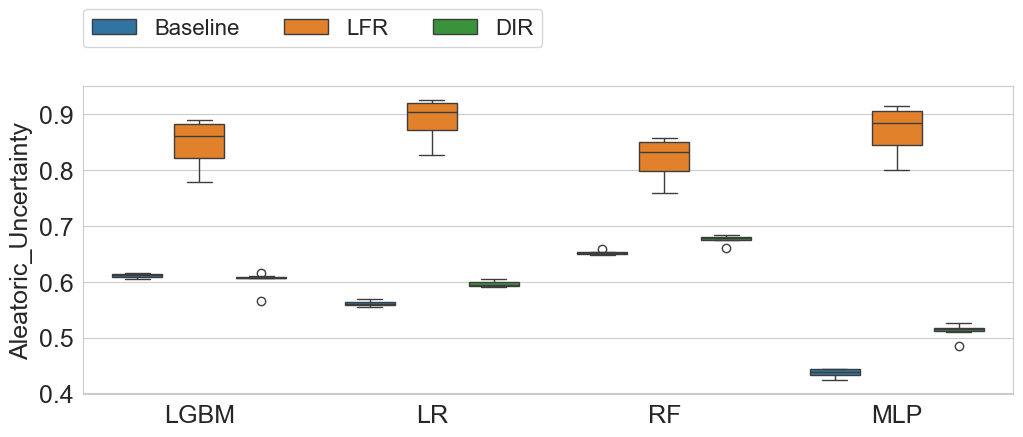

In [14]:
create_box_plot_for_diff_interventions(all_subgroup_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Aleatoric_Uncertainty',
                                       vals_to_replace=vals_to_replace)

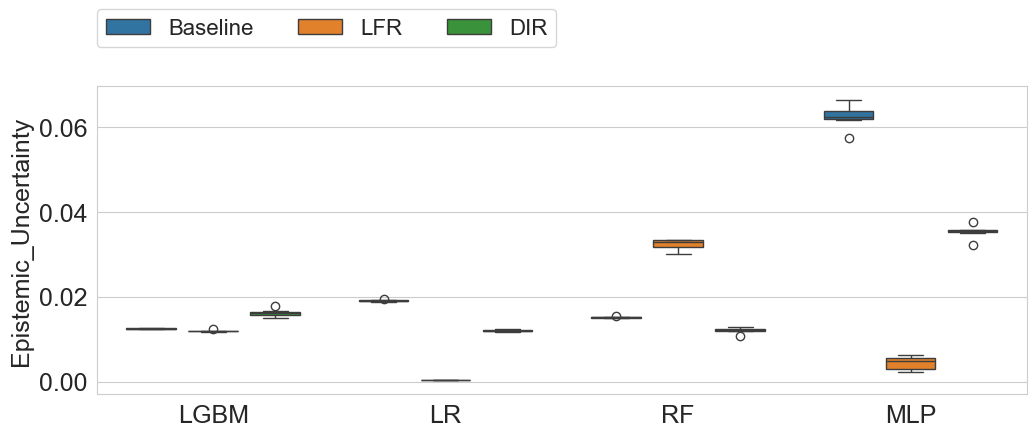

In [15]:
create_box_plot_for_diff_interventions(all_subgroup_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Epistemic_Uncertainty',
                                       vals_to_replace=vals_to_replace)

### Disparity Metrics

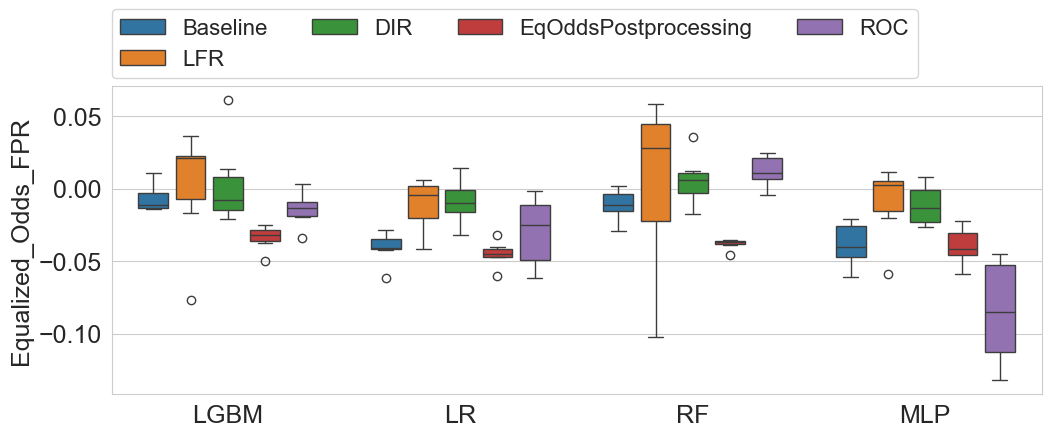

In [16]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Equalized_Odds_FPR',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

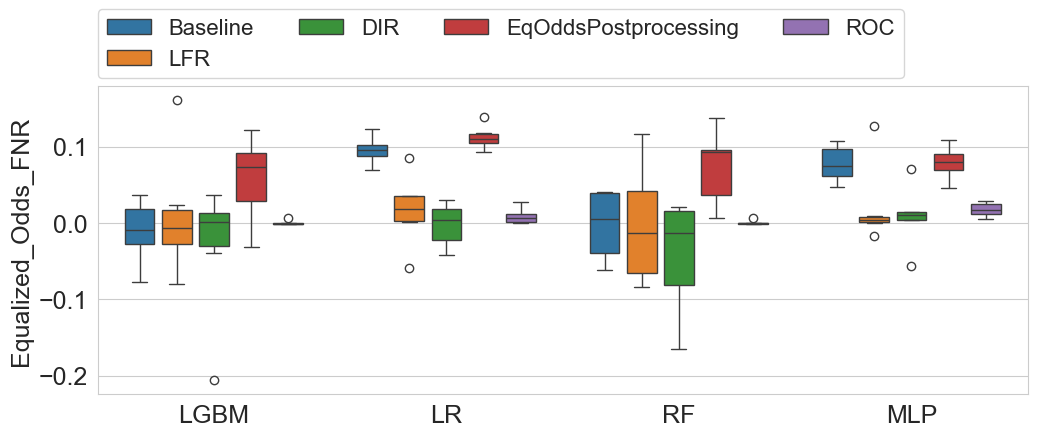

In [17]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Equalized_Odds_FNR',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

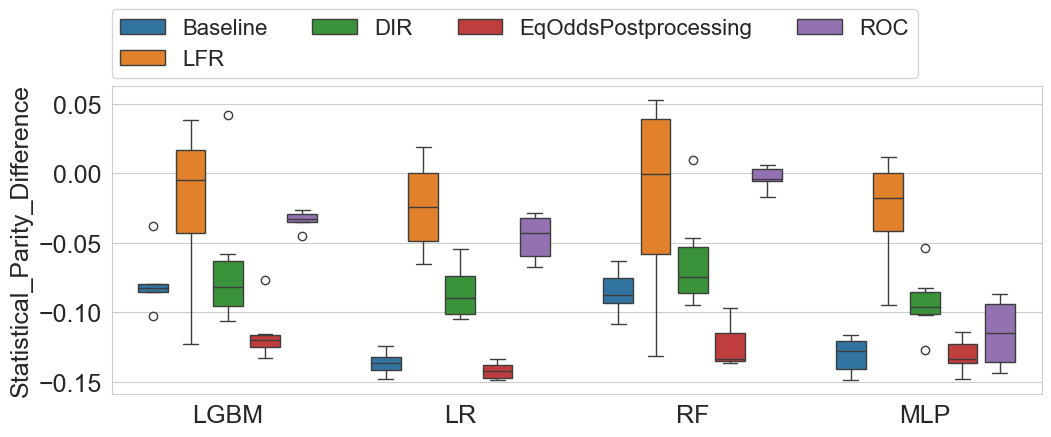

In [18]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Statistical_Parity_Difference',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

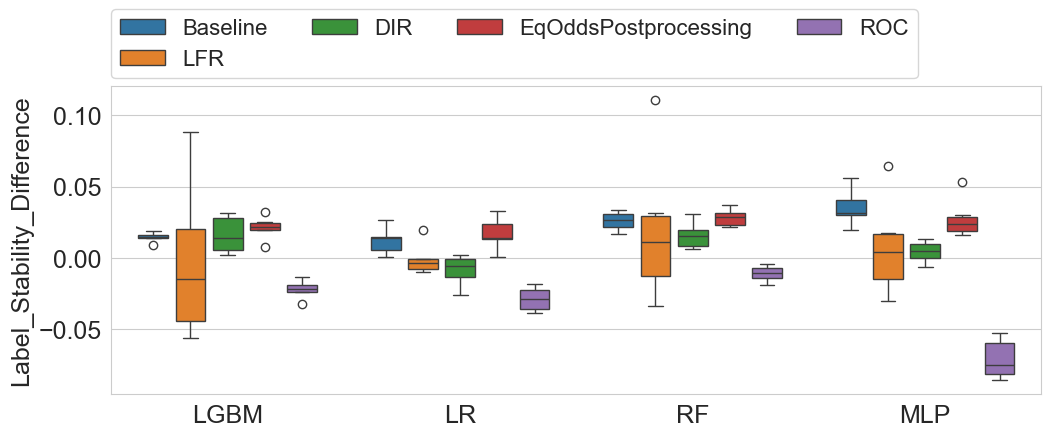

In [19]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Label_Stability_Difference',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

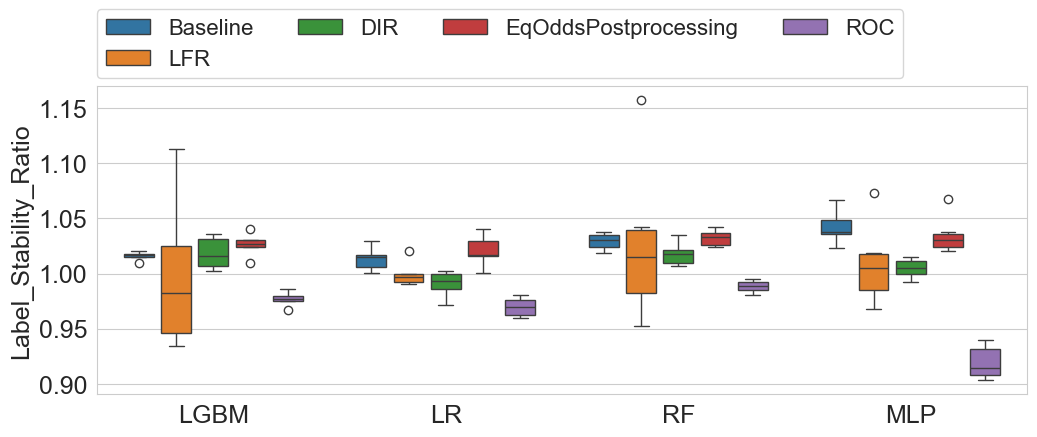

In [20]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Label_Stability_Ratio',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

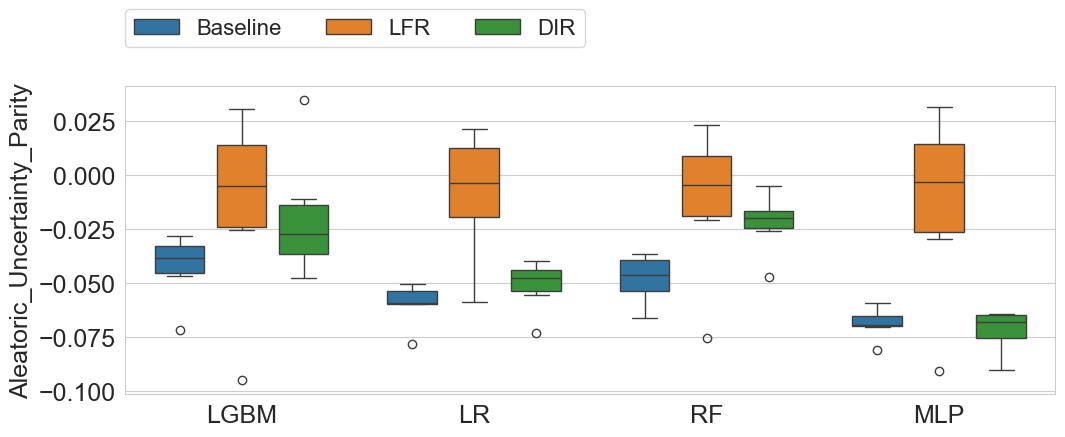

In [21]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Aleatoric_Uncertainty_Parity',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

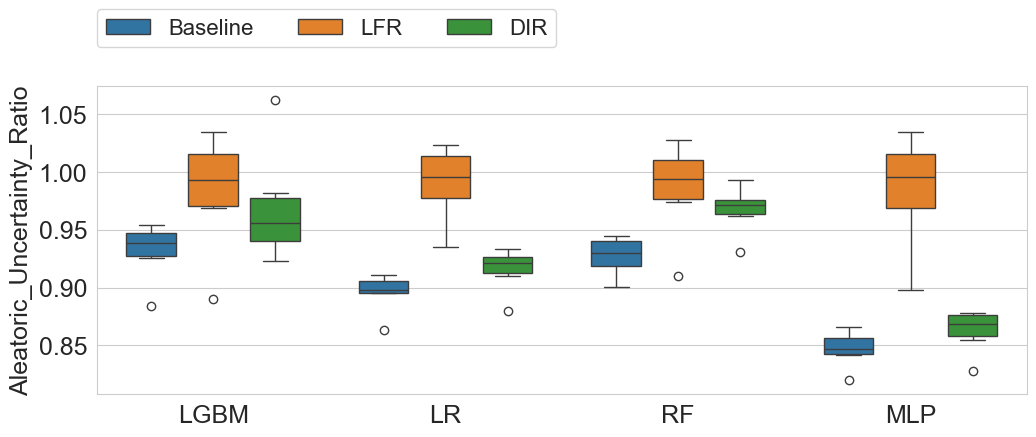

In [22]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Aleatoric_Uncertainty_Ratio',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

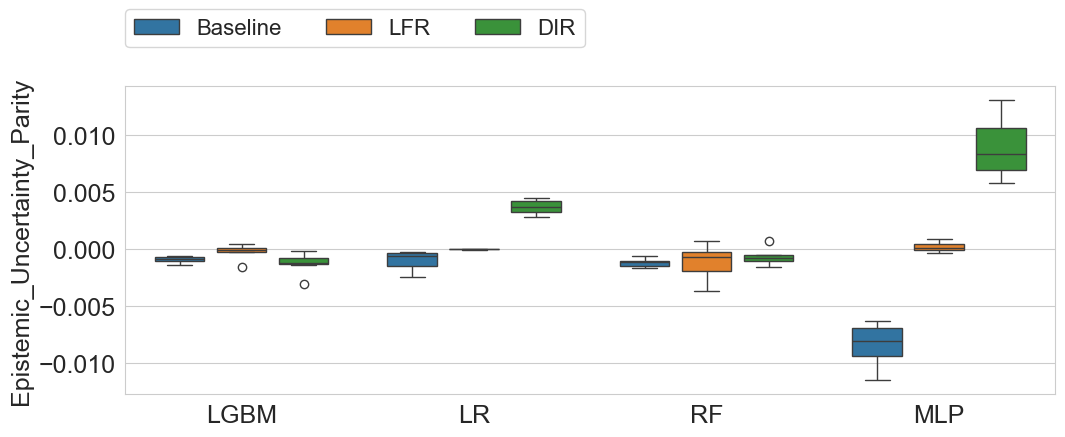

In [23]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Epistemic_Uncertainty_Parity',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)

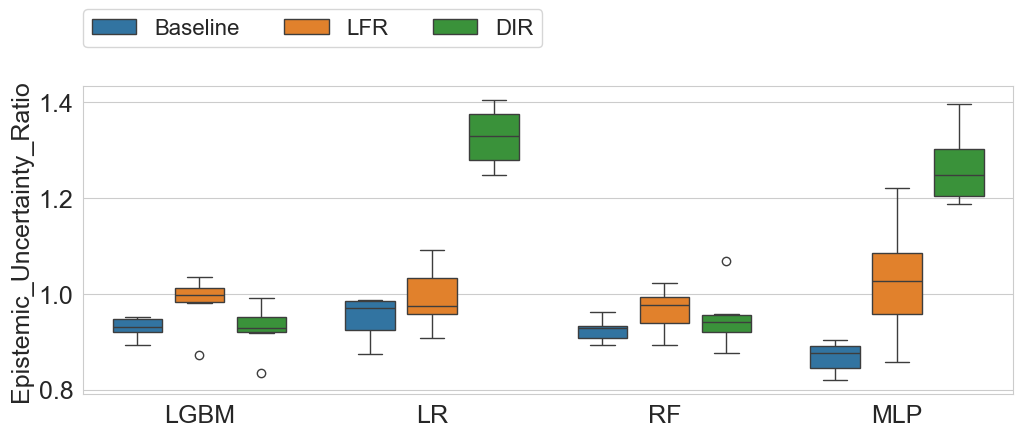

In [24]:
create_box_plot_for_diff_interventions(all_group_metrics_df,
                                       dataset_name=DATASET_NAMES[0],
                                       metric_name='Epistemic_Uncertainty_Ratio',
                                       vals_to_replace=vals_to_replace,
                                       group=SENSITIVE_ATTR_FOR_INTERVENTION)